# CS446/546
## Class session 9:  BFS
Objective: write and test a function that can compute single-vertex shortest paths in an unweighted simple graph.

Make a simple 10-vertex random (Barabasi-Albert model) graph.  Set the random number seed so that the graph is always the same, for purposes of reproducibility (we want to know that the "hub" vertex will be vertex 2, and we will test your BFS function starting at that "hub" vertex).

In [8]:
import random
random.seed(1337)
import igraph
g = igraph.Graph.Barabasi(10)   

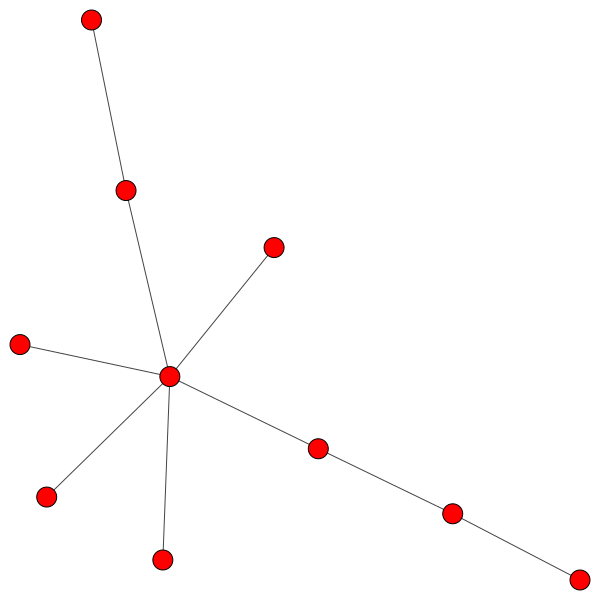

In [9]:
igraph.drawing.plot(g)

In [61]:
g.get_adjedgelist()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Graph.get_adjedgelist() is deprecated since igraph 0.6, please use Graph.get_inclist() instead
  """Entry point for launching an IPython kernel.


[[0, 1, 2, 3, 5, 7], [0, 4], [1], [2], [3, 6], [4, 8], [5], [6], [7], [8]]

In [26]:
g.degree()


[6, 2, 1, 1, 2, 2, 1, 1, 1, 1]

In [59]:
import numpy as np
import math
def bfs_single_vertex(p_graph, p_vertex):
    vs = p_graph.vs()
    N = len(vs)
    queue = [np.nan] * N
    queue[0] = p_vertex
    distances = [np.nan] * N
    distances[p_vertex] = 0
    read_ptr = 0
    write_ptr = 1
    while read_ptr < write_ptr:
        cur_vertex_num = queue[read_ptr]
        read_ptr = read_ptr + 1
        cur_vertex_dist = distances[cur_vertex_num]
        for vn_vertex_num in p_graph.neighbors(cur_vertex_num):
            if math.isnan(distances[vn_vertex_num]):
                distances[vn_vertex_num] = cur_vertex_dist + 1
                queue[write_ptr] = vn_vertex_num
                write_ptr = write_ptr + 1
    return distances

    # while write_ptr is gerater than read_ptr:
    # obtain the vertex ID of the entry at index "read_ptr" in the queue array, as cur_vertex_num
    # increment read_ptr
    # get the distance to cur_vertex_num, from the "distances" array
    # get the neighbors of vertex cur_vertex_num in the graph, using the igraph "neighbors" func
    # for each vertex_neighbor in the array vertex_neighbors
    #    if the distances[vertex_neighbor] is nan:
    #         (1) set the distance to vertex_neighbor (in "distances" vector) to the distance to
    #           cur_vertex_num, plus one
    #         (2) add neighbor to the queue
    #         put vertex_neighbor at position write_ptr in the queue array
    #         increment write_ptr
    # end-while
    # return "distances"
    

Test out your function, starting at vertex 0

In [60]:
bfs_single_vertex(g, 0)

[0, 1, 1, 1, 1, 2, 1, 2, 1, 3]

In [63]:
[len(x) - 1 for x in g.get_shortest_paths(v=0)]

[0, 1, 1, 1, 1, 2, 1, 2, 1, 3]